# Editor : Sahil

# Task 1 : Prediction using Supervised Machine Learning

## Under The Sparks Foundation

## Importing Required Libraries-- Numpy Array, Pandas, Matplotlib


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 1 -- Reading the Data

In [4]:
data= pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

Data imported successfully


In [5]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Step 2 -- Input data Visualization


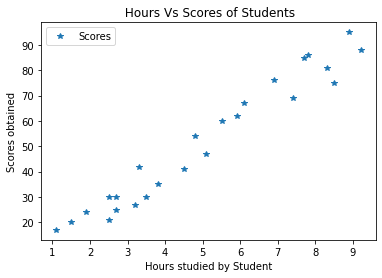

In [7]:
data.plot(x="Hours" , y="Scores" , style ='*')
plt.title(" Hours Vs Scores of Students")
plt.xlabel("Hours studied by Student")
plt.ylabel("Scores obtained")
plt.show()

### As we see in the above graph , we are getting almost a linear relation between our variable , therefore linear regression of order 1 with positive slope can be worked out here

In [8]:
import seaborn as sns

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


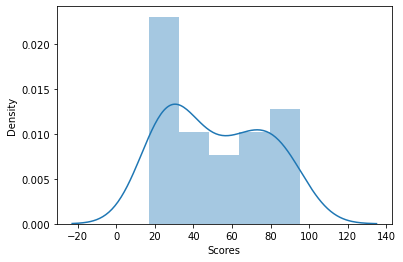

In [9]:
sns.distplot(data['Scores'], bins=5)
plt.show()

<AxesSubplot:>

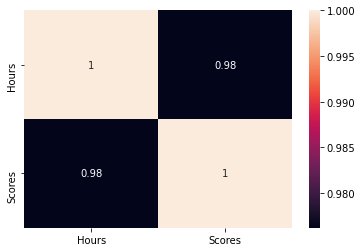

In [10]:
# This is correlation Matrix
sns.heatmap(data.corr(),annot=True)

## Step 3 -- Data Preprocessing

In [11]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [12]:
x


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## Step 4 -- Model Training

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.1,random_state=0)

In [19]:
regressor = LinearRegression()  
regressor.fit(x_train.reshape(-1,1), y_train) 

print("Training complete.")

Training complete.


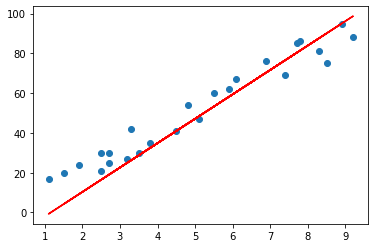

In [20]:
# Plotting the regression line

line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data

plt.scatter(x, y)
plt.plot(x, line,color='red');
plt.show()

## Step 5 -- Testing the Model


In [21]:
print(x_test)
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]]


In [22]:
y_pred

array([ 4.18181818, 25.04545455, 76.59090909, 16.45454545, 58.18181818,
       32.40909091,  9.09090909, 81.5       , 70.45454545, -0.72727273,
       48.36363636, 80.27272727, 26.27272727, 87.63636364, 98.68181818,
       60.63636364, 28.72727273, 18.90909091, 53.27272727, 18.90909091,
       90.09090909, 16.45454545, 44.68181818])

In [23]:
print(pd.DataFrame({'Actual':y_test,'Predicted':y_pred}))

    Actual  Predicted
0       20   4.181818
1       27  25.045455
2       69  76.590909
3       30  16.454545
4       62  58.181818
5       35  32.409091
6       24   9.090909
7       86  81.500000
8       76  70.454545
9       17  -0.727273
10      47  48.363636
11      85  80.272727
12      42  26.272727
13      81  87.636364
14      88  98.681818
15      67  60.636364
16      30  28.727273
17      25  18.909091
18      60  53.272727
19      30  18.909091
20      75  90.090909
21      21  16.454545
22      54  44.681818


### Predicting the some of the data

In [24]:
hours = [[10]]  
own_pred = regressor.predict(hours)  
print("Number of hours = {}".format(hours))  
print("Prediction Score = {}".format(own_pred[0]))

Number of hours = [[10]]
Prediction Score = 108.49999999999997


In [25]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,4.181818
1,27,25.045455
2,69,76.590909
3,30,16.454545
4,62,58.181818
5,35,32.409091
6,24,9.090909
7,86,81.500000
8,76,70.454545
9,17,-0.727273


## Step 6 -- Evaluating the Model

In [27]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))

Mean Absolute Error: 8.158102766798406
Mean Squared Error: 92.01598993891457


In [28]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Root Mean Squared Error: 9.592496543596697
R-2: 0.8408142392090959


### Value of R-2 near 1 indicates it is good score for the model

In [36]:
# This is T-test
from scipy import stats
t_statistic, pvalues =stats.ttest_ind(y_test, y_pred)
print('t-statistic -->',t_statistic)
print('P-value -->',pvalues)

t-statistic --> 0.5568302045327066
P-value --> 0.5804648882453116


In [37]:

f_statistic, pvalues =stats.f_oneway(y_test, y_pred)
print('f-statistic -->',f_statistic)
print('P-value -->',pvalues)

f-statistic --> 0.3100598766799366
P-value --> 0.5804648882453116
